# Prediction of Result Classification Using 
    **************************************************************
    By: Adeyemi Adedoyin Simeon
    Matric: 209188
    Course: Artificial Intelligence
    MSc, Computer Science, Univ. of Ibadan, Nigeria
    adeyemi.sa1@gmail.com
    **************************************************************

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('../../../../Datasets/Results Dataset 2014 to 2016 For ML.xlsx')

In [4]:
df = df.drop(["NAMES","MAT NO","YR OF ENTRY"], axis=1)
df.head()

,S_NO,SESSION,SEX,DOB,STATE,HALL,SPONSOR,MOE,TOT UNITS REG,TOT UNITS PASSED,UNIT NOT IN,FAC REQ,DEPT REQ,TOTAL WGP,CGPA,CLASS OF DEG,CLASS LABEL
0,1,2013/14,F,1994-05-09,OYO STATE,AWO HALL,PARENT,UME,166,166,0,Yes,Yes,833,5,21,2ND CLASS UPPER
1,2,2013/14,M,1992-09-20,OSUN,KUTI,PARENT,UME,172,158,0,Yes,Yes,508,3,22,2ND CLASS LOWER
2,3,2013/14,M,1993-03-13,OYO,OFF CAMPUS,NaN,UME,166,151,0,Yes,Yes,621,3.7,22,2ND CLASS LOWER
3,4,2013/14,F,NaT,NaN,OFF CAMPUS,NaN,UME,169,166,0,Yes,Yes,881,5.2,21,2ND CLASS UPPER
4,5,2013/14,F,1991-02-02,KWARA STAT,IDIA HALL,PARENT,UME,166,166,0,Yes,Yes,881,5.3,21,2ND CLASS UPPER


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 17 columns):
S_NO                265 non-null int64
SESSION             265 non-null object
SEX                 264 non-null object
DOB                 242 non-null datetime64[ns]
STATE               252 non-null object
HALL                265 non-null object
SPONSOR             242 non-null object
MOE                 265 non-null object
TOT UNITS REG       265 non-null int64
TOT UNITS PASSED    265 non-null int64
UNIT NOT IN         265 non-null int64
FAC REQ             265 non-null object
DEPT REQ            265 non-null object
TOTAL WGP           265 non-null int64
CGPA                265 non-null object
CLASS OF DEG        265 non-null object
CLASS LABEL         265 non-null object
dtypes: datetime64[ns](1), int64(5), object(11)
memory usage: 35.3+ KB


In [6]:
df.count()

S_NO                265
SESSION             265
SEX                 264
DOB                 242
STATE               252
HALL                265
SPONSOR             242
MOE                 265
TOT UNITS REG       265
TOT UNITS PASSED    265
UNIT NOT IN         265
FAC REQ             265
DEPT REQ            265
TOTAL WGP           265
CGPA                265
CLASS OF DEG        265
CLASS LABEL         265
dtype: int64

# DATA PREPARATION AND CLEANING

In [7]:
# Number of null values in SEX col
len(df[df.SEX.isnull()]['SEX'])

1

In [8]:
# Number of null values in DOB col
len(df[df.DOB.isnull()]['DOB'])

23

In [9]:
# Number of null values in STATE col
len(df[df.STATE.isnull()]['STATE'])

13

In [10]:
# Number of null values in SPONSOR col
len(df[df.SPONSOR.isnull()]['SPONSOR'])

23

In [11]:
# filling null values
df.SEX.fillna(df.SEX.mode()[0],axis=0,inplace=True)
df.DOB.fillna(df.DOB.max(),axis=0,inplace=True)
df.STATE.fillna(df.STATE.mode()[0],axis=0,inplace=True)
df.SPONSOR.fillna(df.SPONSOR.mode()[0],axis=0,inplace=True)

In [12]:
df.DOB.max()

Timestamp('1996-12-19 00:00:00')

In [13]:
# Confirming to see that all null values have been filled
df.count()

S_NO                265
SESSION             265
SEX                 265
DOB                 265
STATE               265
HALL                265
SPONSOR             265
MOE                 265
TOT UNITS REG       265
TOT UNITS PASSED    265
UNIT NOT IN         265
FAC REQ             265
DEPT REQ            265
TOTAL WGP           265
CGPA                265
CLASS OF DEG        265
CLASS LABEL         265
dtype: int64

In [14]:
df.head()

,S_NO,SESSION,SEX,DOB,STATE,HALL,SPONSOR,MOE,TOT UNITS REG,TOT UNITS PASSED,UNIT NOT IN,FAC REQ,DEPT REQ,TOTAL WGP,CGPA,CLASS OF DEG,CLASS LABEL
0,1,2013/14,F,1994-05-09,OYO STATE,AWO HALL,PARENT,UME,166,166,0,Yes,Yes,833,5,21,2ND CLASS UPPER
1,2,2013/14,M,1992-09-20,OSUN,KUTI,PARENT,UME,172,158,0,Yes,Yes,508,3,22,2ND CLASS LOWER
2,3,2013/14,M,1993-03-13,OYO,OFF CAMPUS,PARENT,UME,166,151,0,Yes,Yes,621,3.7,22,2ND CLASS LOWER
3,4,2013/14,F,1996-12-19,OYO,OFF CAMPUS,PARENT,UME,169,166,0,Yes,Yes,881,5.2,21,2ND CLASS UPPER
4,5,2013/14,F,1991-02-02,KWARA STAT,IDIA HALL,PARENT,UME,166,166,0,Yes,Yes,881,5.3,21,2ND CLASS UPPER


In [15]:
# formating STATE col to remove the "STATE" word at the back e.g. "OYO STATE" becomes "OYO"
df.STATE = df.STATE.apply(lambda x: x.split(' ')[0])

In [16]:
def removeHallWord(str_val):
    if (str_val.split(' ')[-1] == 'HALL' or str_val.split(' ')[-1] == 'HAL'):
        return str_val.split(' ')[0]
    else:
        return '-'.join(str_val.split(' '))

In [17]:
# formating HALL to maintain consistency i.e. remove "HALL" at the back of the school Hostels
df.HALL = list(map(removeHallWord,df.HALL))

In [18]:
df.SPONSOR.unique()

array(['PARENT', 'PARENTS', 'PARNTS', 'PARTENTS', 'SELF', 'BROTHER',
       'SISTER'], dtype=object)

In [19]:
def correctSpelling(sponsor):
    if(sponsor.endswith('NTS')):
        return 'PARENTS'
    else:
        return sponsor

In [20]:
# Correcting the spelling mistakes for SPONSOR col
df.SPONSOR = df.SPONSOR.apply(correctSpelling)

In [21]:
df.SPONSOR.unique()

array(['PARENT', 'PARENTS', 'SELF', 'BROTHER', 'SISTER'], dtype=object)

In [22]:
def convertWrongCGPAToZero(cgpa):
    if(cgpa == '-'):
        return 0
    else:
        return cgpa

In [23]:
# converting the dash in CGPA and CLASS OF DEG cols to 0 (number)
df.CGPA = df.CGPA.apply(convertWrongCGPAToZero)
df['CLASS OF DEG'] = df['CLASS OF DEG'].apply(convertWrongCGPAToZero)

In [24]:
def convertWithdrawbToFNG(label):
    if label == 'WITHDRAWN':
        return 'FNG'
    else:
        return label

In [25]:
df['CLASS LABEL'] = df['CLASS LABEL'].apply(convertWithdrawbToFNG)

In [26]:
# First five
df.head()

,S_NO,SESSION,SEX,DOB,STATE,HALL,SPONSOR,MOE,TOT UNITS REG,TOT UNITS PASSED,UNIT NOT IN,FAC REQ,DEPT REQ,TOTAL WGP,CGPA,CLASS OF DEG,CLASS LABEL
0,1,2013/14,F,1994-05-09,OYO,AWO,PARENT,UME,166,166,0,Yes,Yes,833,5.0,21,2ND CLASS UPPER
1,2,2013/14,M,1992-09-20,OSUN,KUTI,PARENT,UME,172,158,0,Yes,Yes,508,3.0,22,2ND CLASS LOWER
2,3,2013/14,M,1993-03-13,OYO,OFF-CAMPUS,PARENT,UME,166,151,0,Yes,Yes,621,3.7,22,2ND CLASS LOWER
3,4,2013/14,F,1996-12-19,OYO,OFF-CAMPUS,PARENT,UME,169,166,0,Yes,Yes,881,5.2,21,2ND CLASS UPPER
4,5,2013/14,F,1991-02-02,KWARA,IDIA,PARENT,UME,166,166,0,Yes,Yes,881,5.3,21,2ND CLASS UPPER


In [27]:
# Last five
df.tail()

,S_NO,SESSION,SEX,DOB,STATE,HALL,SPONSOR,MOE,TOT UNITS REG,TOT UNITS PASSED,UNIT NOT IN,FAC REQ,DEPT REQ,TOTAL WGP,CGPA,CLASS OF DEG,CLASS LABEL
260,261,2015/16,F,1990-12-31,OSUN,AWO,PARENT,DE,135,135,0,Yes,Yes,590,4.4,22,2ND CLASS LOWER
261,262,2015/16,F,1992-03-06,LAGOS,OFF-CAMPUS,PARENT,DE,135,135,0,Yes,Yes,577,4.3,22,2ND CLASS LOWER
262,263,2015/16,M,1992-04-11,ONDO,MELLANBY,PARENT,DE,135,135,0,Yes,Yes,602,4.5,22,2ND CLASS UPPER
263,264,2015/16,F,1991-05-31,KOGI,IDIA,PARENT,DE,135,120,0,Yes,Yes,352,2.6,22,2ND CLASS LOWER
264,265,2015/16,M,1991-12-26,OGUN,ZIK,PARENT,DE,135,121,0,Yes,Yes,275,2.0,3rd,3RD CLASS


In [28]:
# Saving a copy of the Cleaned Dataset
df.to_csv('../../../../Datasets/Cleaned Result Dataset 2014 to 2016 for ML-For-GitHub.csv')

# DATA ANALYSIS AND VISUALIZATIONS

In [29]:
sess_13_14 = df[df.SESSION == '2013/14']
sess_14_15 = df[df.SESSION == '2014/15']
sess_15_16 = df[df.SESSION == '2015/16']

## Performances Based on Mode of Entry per Session

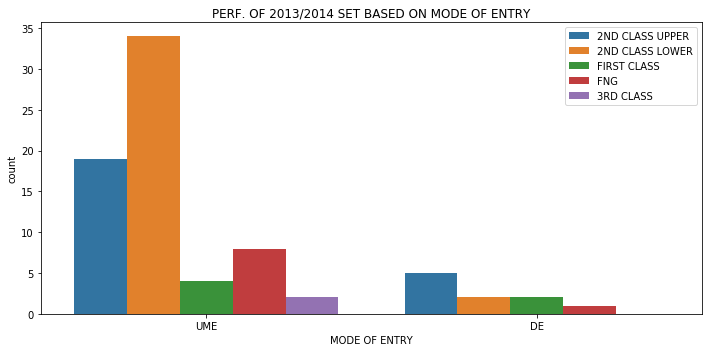

In [30]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='MOE',data=sess_13_14,hue='CLASS LABEL')
plt.title('PERF. OF 2013/2014 SET BASED ON MODE OF ENTRY')
plt.xlabel('MODE OF ENTRY')
plt.legend(loc='upper right')
plt.tight_layout()

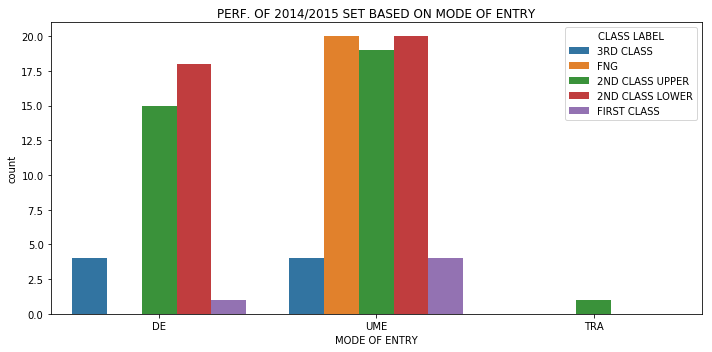

In [31]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='MOE',data=sess_14_15,hue='CLASS LABEL')
plt.title('PERF. OF 2014/2015 SET BASED ON MODE OF ENTRY')
plt.xlabel('MODE OF ENTRY')
plt.tight_layout()

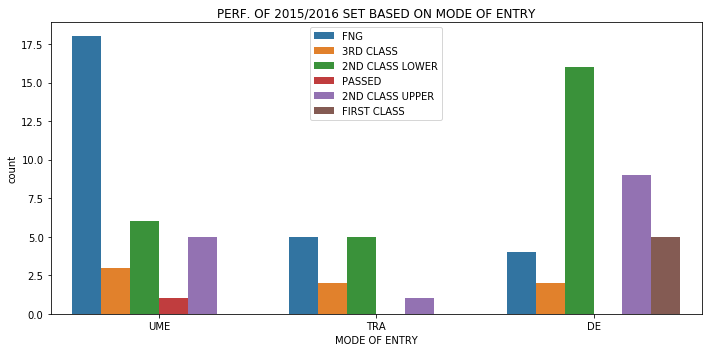

In [32]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='MOE',data=sess_15_16,hue='CLASS LABEL')
plt.title('PERF. OF 2015/2016 SET BASED ON MODE OF ENTRY')
plt.xlabel('MODE OF ENTRY')
plt.legend(loc='upper center')
plt.tight_layout()

## Performances Based on Residence per Session

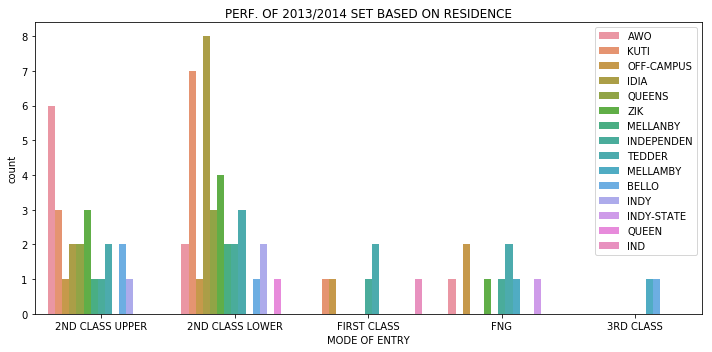

In [33]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='CLASS LABEL',data=sess_13_14,hue='HALL')
plt.title('PERF. OF 2013/2014 SET BASED ON RESIDENCE')
plt.xlabel('MODE OF ENTRY')
plt.legend(loc='upper right')
plt.tight_layout()

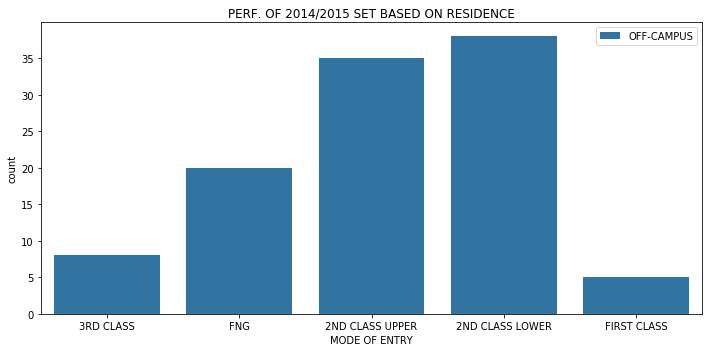

In [34]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='CLASS LABEL',data=sess_14_15,hue='HALL')
plt.title('PERF. OF 2014/2015 SET BASED ON RESIDENCE')
plt.xlabel('MODE OF ENTRY')
plt.legend(loc='upper right')
plt.tight_layout()

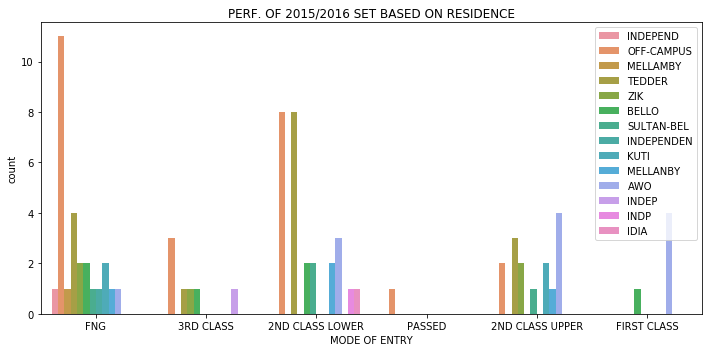

In [35]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='CLASS LABEL',data=sess_15_16,hue='HALL')
plt.title('PERF. OF 2015/2016 SET BASED ON RESIDENCE')
plt.xlabel('MODE OF ENTRY')
plt.legend(loc='upper right')
plt.tight_layout()

# Overall Pereformances based on Mode of Entry

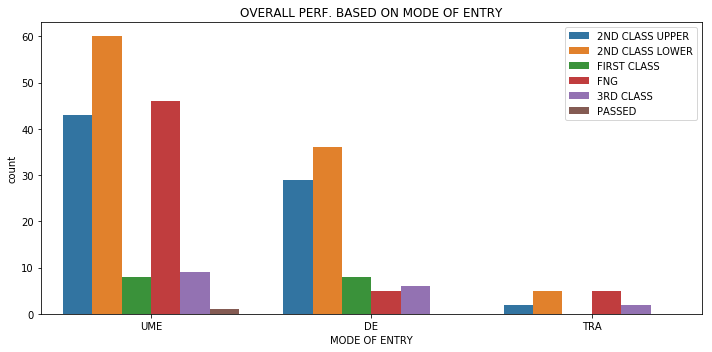

In [36]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='MOE',data=df,hue='CLASS LABEL')
plt.title('OVERALL PERF. BASED ON MODE OF ENTRY')
plt.xlabel('MODE OF ENTRY')
plt.legend(loc='upper right')
plt.tight_layout()

# Performances of UTME Students per Session

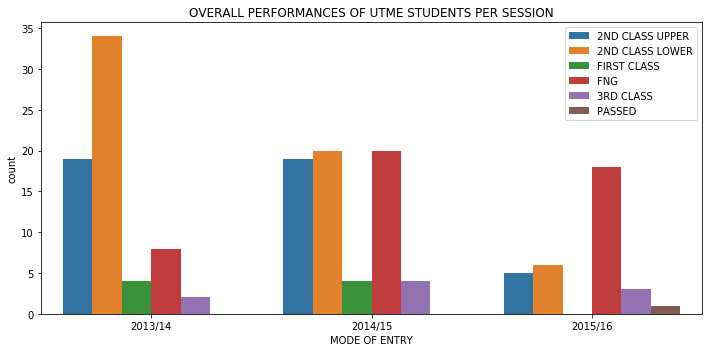

In [37]:
fig = plt.figure(figsize=(10,5))

sns.countplot(x='SESSION',data=df[df.MOE == 'UME'],hue='CLASS LABEL')
plt.title('OVERALL PERFORMANCES OF UTME STUDENTS PER SESSION')
plt.xlabel('MODE OF ENTRY')
plt.legend(loc='upper right')
plt.tight_layout()

# Performances of DE Students per Session

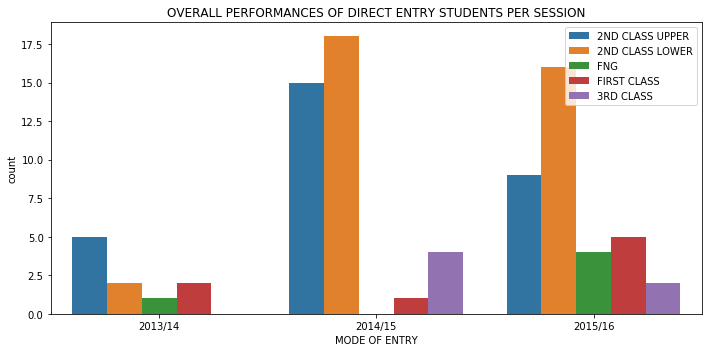

In [38]:
fig = plt.figure(figsize=(10,5))

sns.countplot(x='SESSION',data=df[df.MOE == 'DE'],hue='CLASS LABEL')
plt.title('OVERALL PERFORMANCES OF DIRECT ENTRY STUDENTS PER SESSION')
plt.xlabel('MODE OF ENTRY')
plt.legend(loc='upper right')
plt.tight_layout()

## Average Performance of students per session, according to their Mode of Entry (MOE)

In [39]:
ab = df.groupby(['SESSION','MOE'],axis=0).mean()['CGPA']
pd.DataFrame(ab)

CGPA
SESSION MOE          
2013/14 DE   4.510000
        UME  3.577612
2014/15 DE   4.042105
        TRA  5.400000
        UME  3.034328
2015/16 DE   3.886111
        TRA  2.069231
        UME  1.660606

## Average Performance of students from 2013/2014 to 2015/2016 set (On the basis classification and their Entry Mode)

In [40]:
ab2 = df.groupby(['CLASS LABEL','MOE'],axis=0).count()['CGPA']
ab2 = ab2.transpose()
pd.DataFrame(ab2)

CGPA
CLASS LABEL     MOE      
2ND CLASS LOWER DE     36
                TRA     5
                UME    60
2ND CLASS UPPER DE     29
                TRA     2
                UME    43
3RD CLASS       DE      6
                TRA     2
                UME     9
FIRST CLASS     DE      8
                UME     8
FNG             DE      5
                TRA     5
                UME    46
PASSED          UME     1

# Peeping into the Dataset again

In [41]:
df.head()

,S_NO,SESSION,SEX,DOB,STATE,HALL,SPONSOR,MOE,TOT UNITS REG,TOT UNITS PASSED,UNIT NOT IN,FAC REQ,DEPT REQ,TOTAL WGP,CGPA,CLASS OF DEG,CLASS LABEL
0,1,2013/14,F,1994-05-09,OYO,AWO,PARENT,UME,166,166,0,Yes,Yes,833,5.0,21,2ND CLASS UPPER
1,2,2013/14,M,1992-09-20,OSUN,KUTI,PARENT,UME,172,158,0,Yes,Yes,508,3.0,22,2ND CLASS LOWER
2,3,2013/14,M,1993-03-13,OYO,OFF-CAMPUS,PARENT,UME,166,151,0,Yes,Yes,621,3.7,22,2ND CLASS LOWER
3,4,2013/14,F,1996-12-19,OYO,OFF-CAMPUS,PARENT,UME,169,166,0,Yes,Yes,881,5.2,21,2ND CLASS UPPER
4,5,2013/14,F,1991-02-02,KWARA,IDIA,PARENT,UME,166,166,0,Yes,Yes,881,5.3,21,2ND CLASS UPPER


In [42]:
df.count()

S_NO                265
SESSION             265
SEX                 265
DOB                 265
STATE               265
HALL                265
SPONSOR             265
MOE                 265
TOT UNITS REG       265
TOT UNITS PASSED    265
UNIT NOT IN         265
FAC REQ             265
DEPT REQ            265
TOTAL WGP           265
CGPA                265
CLASS OF DEG        265
CLASS LABEL         265
dtype: int64

# DATA PREPROCESSING FOR ML MODEL
    1. Feature Extraction
    2. Dimensionality Reduction
    3. Label Encoding
    4. Scaling

In [43]:
df.head()

,S_NO,SESSION,SEX,DOB,STATE,HALL,SPONSOR,MOE,TOT UNITS REG,TOT UNITS PASSED,UNIT NOT IN,FAC REQ,DEPT REQ,TOTAL WGP,CGPA,CLASS OF DEG,CLASS LABEL
0,1,2013/14,F,1994-05-09,OYO,AWO,PARENT,UME,166,166,0,Yes,Yes,833,5.0,21,2ND CLASS UPPER
1,2,2013/14,M,1992-09-20,OSUN,KUTI,PARENT,UME,172,158,0,Yes,Yes,508,3.0,22,2ND CLASS LOWER
2,3,2013/14,M,1993-03-13,OYO,OFF-CAMPUS,PARENT,UME,166,151,0,Yes,Yes,621,3.7,22,2ND CLASS LOWER
3,4,2013/14,F,1996-12-19,OYO,OFF-CAMPUS,PARENT,UME,169,166,0,Yes,Yes,881,5.2,21,2ND CLASS UPPER
4,5,2013/14,F,1991-02-02,KWARA,IDIA,PARENT,UME,166,166,0,Yes,Yes,881,5.3,21,2ND CLASS UPPER


In [44]:
# Dimensionality Reduction by eliminating redundant features
preprocessed_data = df.drop(['S_NO','SESSION','STATE','DOB','HALL','CLASS OF DEG'],axis=1)

In [45]:
preprocessed_data.head()

,SEX,SPONSOR,MOE,TOT UNITS REG,TOT UNITS PASSED,UNIT NOT IN,FAC REQ,DEPT REQ,TOTAL WGP,CGPA,CLASS LABEL
0,F,PARENT,UME,166,166,0,Yes,Yes,833,5.0,2ND CLASS UPPER
1,M,PARENT,UME,172,158,0,Yes,Yes,508,3.0,2ND CLASS LOWER
2,M,PARENT,UME,166,151,0,Yes,Yes,621,3.7,2ND CLASS LOWER
3,F,PARENT,UME,169,166,0,Yes,Yes,881,5.2,2ND CLASS UPPER
4,F,PARENT,UME,166,166,0,Yes,Yes,881,5.3,2ND CLASS UPPER


## Label Encoding

In [46]:
from pandas import get_dummies
from sklearn.preprocessing import LabelEncoder

In [47]:
sex_encoder = LabelEncoder()
sponsor = get_dummies(df.SPONSOR)
moe = get_dummies(df.MOE)
fac_req_encoder = LabelEncoder()
dept_req_encoder = LabelEncoder()
#class_label = LabelEncoder()

In [48]:
sex_encoder = sex_encoder.fit_transform(df.SEX)
fac_req_encoder = fac_req_encoder.fit_transform(df['FAC REQ'])
dept_req_encoder = dept_req_encoder.fit_transform(df['DEPT REQ'])

In [49]:
# Converting Encoded Labels into Dataframe
sex = pd.DataFrame(sex_encoder,columns=['SEX'])
fac_req = pd.DataFrame(fac_req_encoder,columns=['FAC REQ'])
dept_req = pd.DataFrame(dept_req_encoder,columns=['DEPT REQ'])

In [50]:
moe.head(3)

,DE,TRA,UME
0,0,0,1
1,0,0,1
2,0,0,1


In [51]:
sponsor.head(3)

,BROTHER,PARENT,PARENTS,SELF,SISTER
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0


In [52]:
# Droping a column each  to avoid Multi-colinearity
moe.drop('TRA',axis=True,inplace=True)
sponsor.drop('SISTER',axis=True,inplace=True)

In [53]:
moe.head(2)

,DE,UME
0,0,1
1,0,1


In [54]:
sponsor.head(2)

,BROTHER,PARENT,PARENTS,SELF
0,0,1,0,0
1,0,1,0,0


### Replacing Encoded columns from the main Dataset

In [55]:
preprocessed_data.drop(['SEX','SPONSOR','MOE','FAC REQ','DEPT REQ'], axis=True, inplace=True)

In [56]:
preprocessed_data.head()

,TOT UNITS REG,TOT UNITS PASSED,UNIT NOT IN,TOTAL WGP,CGPA,CLASS LABEL
0,166,166,0,833,5.0,2ND CLASS UPPER
1,172,158,0,508,3.0,2ND CLASS LOWER
2,166,151,0,621,3.7,2ND CLASS LOWER
3,169,166,0,881,5.2,2ND CLASS UPPER
4,166,166,0,881,5.3,2ND CLASS UPPER


In [57]:
preprocessed_data = pd.concat([sex,sponsor,moe,fac_req,dept_req,preprocessed_data],axis=1)

In [58]:
preprocessed_data.head(3)

,SEX,BROTHER,PARENT,PARENTS,SELF,DE,UME,FAC REQ,DEPT REQ,TOT UNITS REG,TOT UNITS PASSED,UNIT NOT IN,TOTAL WGP,CGPA,CLASS LABEL
0,0,0,1,0,0,0,1,1,3,166,166,0,833,5.0,2ND CLASS UPPER
1,1,0,1,0,0,0,1,1,3,172,158,0,508,3.0,2ND CLASS LOWER
2,1,0,1,0,0,0,1,1,3,166,151,0,621,3.7,2ND CLASS LOWER


### Splitting dataset into X (independent) variable and y (dependent) variable

In [59]:
X = preprocessed_data.drop('CLASS LABEL',axis=1)
y = preprocessed_data['CLASS LABEL']

# SCALING
    *To fit well into Models, esp ones that depend on distance measurement like KNN

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scale = StandardScaler()

In [62]:
scaled_x = scale.fit_transform(X)

In [63]:
scaled_x = pd.DataFrame(scaled_x,columns=X.columns)

In [64]:
scaled_x.head()

,SEX,BROTHER,PARENT,PARENTS,SELF,DE,UME,FAC REQ,DEPT REQ,TOT UNITS REG,TOT UNITS PASSED,UNIT NOT IN,TOTAL WGP,CGPA
0,-1.548366,-0.107006,0.829396,-0.791054,-0.087204,-0.68124,0.766046,0.30089,0.769965,0.131670,0.979246,-0.214898,1.150719,0.865506
1,0.645842,-0.107006,0.829396,-0.791054,-0.087204,-0.68124,0.766046,0.30089,0.769965,0.342713,0.646233,-0.214898,-0.385470,-0.139794
2,0.645842,-0.107006,0.829396,-0.791054,-0.087204,-0.68124,0.766046,0.30089,0.769965,0.131670,0.354847,-0.214898,0.148651,0.212061
3,-1.548366,-0.107006,0.829396,-0.791054,-0.087204,-0.68124,0.766046,0.30089,0.769965,0.237192,0.979246,-0.214898,1.377602,0.966036
4,-1.548366,-0.107006,0.829396,-0.791054,-0.087204,-0.68124,0.766046,0.30089,0.769965,0.131670,0.979246,-0.214898,1.377602,1.016301


# Splitting the Dataset into Training and Test set

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.20, random_state=100)

# BUILDING THE ML MODELS

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

### Initializing the models

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
param_knn = {'n_neighbors': list(range(1,50,1))}
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param_knn,scoring='accuracy')

In [70]:
params_svc = {'C':[0.1,0.5,1,5,10,50,100,500,1000],'gamma':[1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}
grid_svc = GridSearchCV(estimator=SVC(),param_grid=params_svc, scoring='accuracy')

In [71]:
param_rnd_For = {'n_estimators': list(range(10,30)),'criterion': ['entropy','gini']}
grid_rnd_for = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_rnd_For,scoring='accuracy')

In [72]:
dTree = DecisionTreeClassifier(criterion='entropy')

In [73]:
naive_bayes = GaussianNB()

# USING DEEP NEURAL NETWORK (ANN)

In [74]:
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [75]:
ann_model = Sequential()
out_node_dim = int((len(scaled_x.columns) + y_train.nunique()) / 2)

In [76]:
# Adding the first hidden layer and input layer
ann_model.add(Dense(units=out_node_dim, 
                    activation='relu',
                    kernel_initializer='uniform', 
                    input_shape=(len(scaled_x.columns),)
                   ))

Instructions for updating:
Colocations handled automatically by placer.


In [77]:
# Adding the SECOND HIDDEN LAYER
ann_model.add(Dense(units=out_node_dim, 
                    activation='relu',
                    kernel_initializer='uniform', 
                   ))

In [78]:
# Adding the THIRD HIDDEN LAYER
ann_model.add(Dense(units=out_node_dim, 
                    activation='relu',
                    kernel_initializer='uniform', 
                   ))

In [79]:
# Adding the Final OUTPUT LAYER
ann_model.add(Dense(units=y_train.nunique(), 
                    activation='softmax',
                    kernel_initializer='uniform', 
                   ))

In [80]:
# Compiling the Deep Neural Network
ann_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

###### Training (Fitting) the models

In [81]:
grid_knn.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [82]:
grid_svc.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [83]:
grid_rnd_for.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [84]:
dTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [85]:
naive_bayes.fit(X_train,y_train)

GaussianNB(priors=None)

In [86]:
y_ann = get_dummies(y_train) 

In [101]:
ann_model.fit(X_train,y_ann, batch_size=10, epochs=200)

Epoch 1/200
212/212 [==============================] - 0s 2ms/step - loss: 0.0903 - acc: 0.9811A: 0s - loss: 0.0991 - acc: 0.
Epoch 2/200
212/212 [==============================] - 0s 1ms/step - loss: 0.0900 - acc: 0.9811
Epoch 3/200
212/212 [==============================] - 0s 1ms/step - loss: 0.0877 - acc: 0.9858A: 0s - loss: 0.1099 - acc: 0.
Epoch 4/200
212/212 [==============================] - 0s 1ms/step - loss: 0.0914 - acc: 0.9764
Epoch 5/200
212/212 [==============================] - 0s 1ms/step - loss: 0.0940 - acc: 0.9811
Epoch 6/200
212/212 [==============================] - 0s 1ms/step - loss: 0.0863 - acc: 0.9858
Epoch 7/200
212/212 [==============================] - 0s 1ms/step - loss: 0.0808 - acc: 0.9858
Epoch 8/200
212/212 [==============================] - 0s 1ms/step - loss: 0.0793 - acc: 0.9811
Epoch 9/200
212/212 [==============================] - ETA: 0s - loss: 0.0908 - acc: 0.976 - 0s 2ms/step - loss: 0.0901 - acc: 0.9764
Epoch 10/200
212/212 [================

212/212 [==============================] - 0s 2ms/step - loss: 0.0527 - acc: 0.9858
Epoch 80/200
212/212 [==============================] - 0s 2ms/step - loss: 0.0495 - acc: 0.9906
Epoch 81/200
212/212 [==============================] - 0s 1ms/step - loss: 0.0443 - acc: 0.9858
Epoch 82/200
212/212 [==============================] - 0s 1ms/step - loss: 0.0425 - acc: 0.9953
Epoch 83/200
212/212 [==============================] - 0s 1ms/step - loss: 0.0459 - acc: 0.9858
Epoch 84/200
212/212 [==============================] - 0s 2ms/step - loss: 0.0416 - acc: 0.9953
Epoch 85/200
212/212 [==============================] - 0s 1ms/step - loss: 0.0450 - acc: 0.9906A: 0s - loss: 0.0163 - acc: 1.
Epoch 86/200
212/212 [==============================] - 0s 1ms/step - loss: 0.0717 - acc: 0.9717
Epoch 87/200
212/212 [==============================] - 0s 1ms/step - loss: 0.0473 - acc: 0.9858
Epoch 88/200
212/212 [==============================] - 0s 2ms/step - loss: 0.0430 - acc: 0.9858
Epoch 89/200


C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119082). Check your callbacks.
  % delta_t_median)


212/212 [==============================] - 1s 4ms/step - loss: 0.0382 - acc: 0.9906
Epoch 114/200
212/212 [==============================] - 1s 6ms/step - loss: 0.0330 - acc: 0.9953
Epoch 115/200
 30/212 [===>..........................] - ETA: 1s - loss: 0.0299 - acc: 1.000

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134084). Check your callbacks.
  % delta_t_median)


212/212 [==============================] - 1s 5ms/step - loss: 0.0336 - acc: 0.9953
Epoch 116/200
212/212 [==============================] - 1s 3ms/step - loss: 0.0325 - acc: 0.9953
Epoch 117/200
212/212 [==============================] - 0s 2ms/step - loss: 0.0333 - acc: 0.9953
Epoch 118/200
212/212 [==============================] - 0s 2ms/step - loss: 0.0405 - acc: 0.9858
Epoch 119/200
212/212 [==============================] - 0s 2ms/step - loss: 0.0416 - acc: 0.9811
Epoch 120/200
212/212 [==============================] - 0s 2ms/step - loss: 0.0350 - acc: 0.9906
Epoch 121/200
212/212 [==============================] - 1s 3ms/step - loss: 0.0635 - acc: 0.9811A: 0s - loss: 0.0242 - acc
Epoch 122/200
212/212 [==============================] - 0s 2ms/step - loss: 0.0481 - acc: 0.9858
Epoch 123/200
212/212 [==============================] - 0s 2ms/step - loss: 0.0345 - acc: 0.9906
Epoch 124/200
212/212 [==============================] - 0s 2ms/step - loss: 0.0321 - acc: 0.9953
Epoch 12

212/212 [==============================] - 1s 3ms/step - loss: 0.0272 - acc: 0.9858
Epoch 192/200
212/212 [==============================] - 1s 5ms/step - loss: 0.0241 - acc: 0.9953A: 0s - loss: 0.0288 - acc:
Epoch 193/200
212/212 [==============================] - 1s 4ms/step - loss: 0.0194 - acc: 0.9953
Epoch 194/200
212/212 [==============================] - 1s 4ms/step - loss: 0.0199 - acc: 0.9953
Epoch 195/200
212/212 [==============================] - 1s 3ms/step - loss: 0.0200 - acc: 1.0000
Epoch 196/200
212/212 [==============================] - 1s 2ms/step - loss: 0.0188 - acc: 0.9953
Epoch 197/200
212/212 [==============================] - ETA: 0s - loss: 0.0148 - acc: 1.0000- ETA: 0s - loss: 0.0193 - acc: 1. - 0s 2ms/step - loss: 0.0194 - acc: 0.9953
Epoch 198/200
212/212 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 0.9953
Epoch 199/200
212/212 [==============================] - 1s 3ms/step - loss: 0.0186 - acc: 1.0000A: 0s - loss: 0.0187 - acc: 1.0
E

### BEST PARAMETERS

In [102]:
print('Best Parameters for KNN = ',grid_knn.best_params_)

Best Parameters for KNN =  {'n_neighbors': 1}


In [103]:
print('Best Parameters for Random Forest = ',grid_rnd_for.best_params_)

Best Parameters for Random Forest =  {'criterion': 'entropy', 'n_estimators': 17}


In [104]:
print('Best Parameters for SVC = ',grid_svc.best_params_)

Best Parameters for SVC =  {'C': 1000, 'gamma': 0.005}


# MAKING PREDICTIONS ON TEST SET

In [105]:
pred_knn = grid_knn.predict(X_test)
pred_svc = grid_svc.predict(X_test)
pred_dtree = dTree.predict(X_test)
pred_rnd_for = grid_rnd_for.predict(X_test)
pred_naive_bayes = naive_bayes.predict(X_test)
ann_pred = ann_model.predict_classes(X_test)
ann_predicted_labels = [y_ann.columns[i] for i in ann_pred]

# EVALUATING THE MODELS PREDICTIONS

In [106]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [107]:
print('Decision Tree')
print('**************')
print(confusion_matrix(y_test,pred_dtree))
print(classification_report(y_test,pred_dtree))
print(accuracy_score(y_test,pred_dtree))
print('\n\n')

print('Random Forest')
print('**************')
print(confusion_matrix(y_test,pred_rnd_for))
print(classification_report(y_test,pred_rnd_for))
print(accuracy_score(y_test,pred_rnd_for))
print('\n\n')

print('K-Nearest Neighbours')
print('*********************')
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))
print(accuracy_score(y_test,pred_knn))
print('\n\n')

print('Support Vector Classifier')
print('**************************')
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))
print(accuracy_score(y_test,pred_svc))
print('\n\n')

print('Naive Bayes')
print('************')
print(confusion_matrix(y_test,pred_naive_bayes))
print(classification_report(y_test,pred_naive_bayes))
print(accuracy_score(y_test,pred_naive_bayes))
print('\n\n')

print('Artificial Neural Network')
print('**************************')
print(confusion_matrix(y_test,ann_predicted_labels))
print(classification_report(y_test,ann_predicted_labels))
print(accuracy_score(y_test,ann_predicted_labels))
print('\n\n')

Decision Tree
**************
[[20  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
                 precision    recall  f1-score   support

2ND CLASS LOWER       1.00      1.00      1.00        20
2ND CLASS UPPER       1.00      1.00      1.00        13
      3RD CLASS       1.00      1.00      1.00         4
    FIRST CLASS       1.00      1.00      1.00         5
            FNG       1.00      1.00      1.00        11

    avg / total       1.00      1.00      1.00        53

1.0



Random Forest
**************
[[20  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
                 precision    recall  f1-score   support

2ND CLASS LOWER       1.00      1.00      1.00        20
2ND CLASS UPPER       1.00      1.00      1.00        13
      3RD CLASS       1.00      1.00      1.00         4
    FIRST CLASS       1.00      1.00      1.00         5
            FNG       1.00      1.00      1.00        11

    avg

In [108]:
results = pd.DataFrame(list(zip(y_test, pred_knn, pred_svc, pred_dtree, pred_rnd_for, pred_naive_bayes, ann_predicted_labels)), 
                       index=X_test.index, 
                       columns=['TRUE VALUE','KNN Predicttion','SVC Prediction',
                                'Decision Tree Prediction','Random Forest Prediction',
                                'Naive Nayes Prediction','AN Nets Prediction']
                      )

In [109]:
results

,TRUE VALUE,KNN Predicttion,SVC Prediction,Decision Tree Prediction,Random Forest Prediction,Naive Nayes Prediction,AN Nets Prediction
243,2ND CLASS LOWER,2ND CLASS LOWER,2ND CLASS LOWER,2ND CLASS LOWER,2ND CLASS LOWER,2ND CLASS UPPER,2ND CLASS LOWER
160,2ND CLASS UPPER,2ND CLASS UPPER,2ND CLASS UPPER,2ND CLASS UPPER,2ND CLASS UPPER,2ND CLASS UPPER,2ND CLASS UPPER
257,2ND CLASS LOWER,2ND CLASS UPPER,2ND CLASS LOWER,2ND CLASS LOWER,2ND CLASS LOWER,2ND CLASS UPPER,2ND CLASS LOWER
256,FNG,FNG,FNG,FNG,FNG,FNG,FNG
110,FNG,FNG,FNG,FNG,FNG,FNG,FNG
236,FIRST CLASS,FIRST CLASS,FIRST CLASS,FIRST CLASS,FIRST CLASS,FIRST CLASS,FIRST CLASS
52,2ND CLASS UPPER,2ND CLASS UPPER,2ND CLASS UPPER,2ND CLASS UPPER,2ND CLASS UPPER,2ND CLASS UPPER,2ND CLASS UPPER
263,2ND CLASS LOWER,2ND CLASS LOWER,2ND CLASS LOWER,2ND CLASS LOWER,2ND CLASS LOWER,3RD CLASS,2ND CLASS LOWER
97,FNG,FNG,FNG,FNG,FNG,FNG,FNG
245,2ND CLASS LOWER,2ND CLASS LOWER,2ND CLASS LOWER,2ND CLASS LOWER,2ND CLASS LOWER,2ND CLASS LOWER,2ND CLASS LOWER


In [110]:
model_names = ['KNN','SVC','DT','RND FOR','NB','ANN']
knn_acc = accuracy_score(y_test, pred_knn) * 100
svc_acc = accuracy_score(y_test, pred_svc) * 100
dtree_acc = accuracy_score(y_test, pred_dtree) * 100
rnd_acc = accuracy_score(y_test,pred_rnd_for) * 100
nb_acc = accuracy_score(y_test, pred_naive_bayes) * 100
ann_acc = accuracy_score(y_test,ann_predicted_labels) * 100

model_accuracy = [knn_acc, svc_acc, dtree_acc, rnd_acc, nb_acc, ann_acc]

accuracy_table = pd.DataFrame(data=list(zip(model_names, 
                                            list(map(lambda x: round(x,1),model_accuracy))
                                           )
                                       ), 
                              columns=['MODEL','ACCURACY'])


In [111]:
accuracy_table

,MODEL,ACCURACY
0,KNN,90.6
1,SVC,96.2
2,DT,100.0
3,RND FOR,100.0
4,NB,67.9
5,ANN,92.5


In [112]:
accuracy_table.sort_values(by='ACCURACY',ascending=False)

,MODEL,ACCURACY
2,DT,100.0
3,RND FOR,100.0
1,SVC,96.2
5,ANN,92.5
0,KNN,90.6
4,NB,67.9


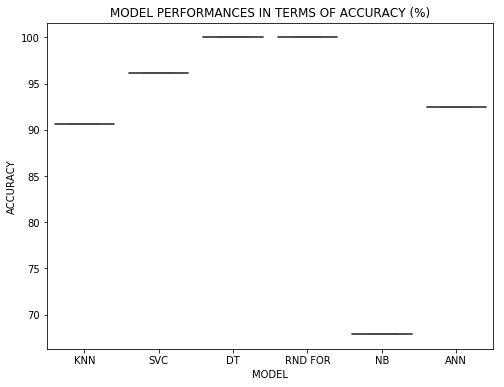

In [113]:
fig = plt.figure(figsize=(8,6))
plt.title('MODEL PERFORMANCES IN TERMS OF ACCURACY (%)')
sns.boxplot(x='MODEL', y='ACCURACY',data=accuracy_table,palette='rainbow')

# =================== THE END =================================